In [1]:
from hossam import *
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)
from scipy.stats import shapiro, jarque_bera, t, f
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.graphics.gofplots import qqplot as sm_qqplot

In [2]:
origin = load_data("fish_processed")
origin.head()

농어의 길이,높이,두께,무게를 조사한 데이터의 전처리 버전


,길이,높이,두께,무게
0,-2.180225,-2.016507,-1.896175,1.931521
1,-1.587434,-1.518703,-1.560774,3.496508
2,-1.442032,-1.417039,-1.316328,3.713572
3,-1.307815,-1.147103,-1.202633,3.960813
4,-1.173599,-1.147103,-1.026405,4.262680


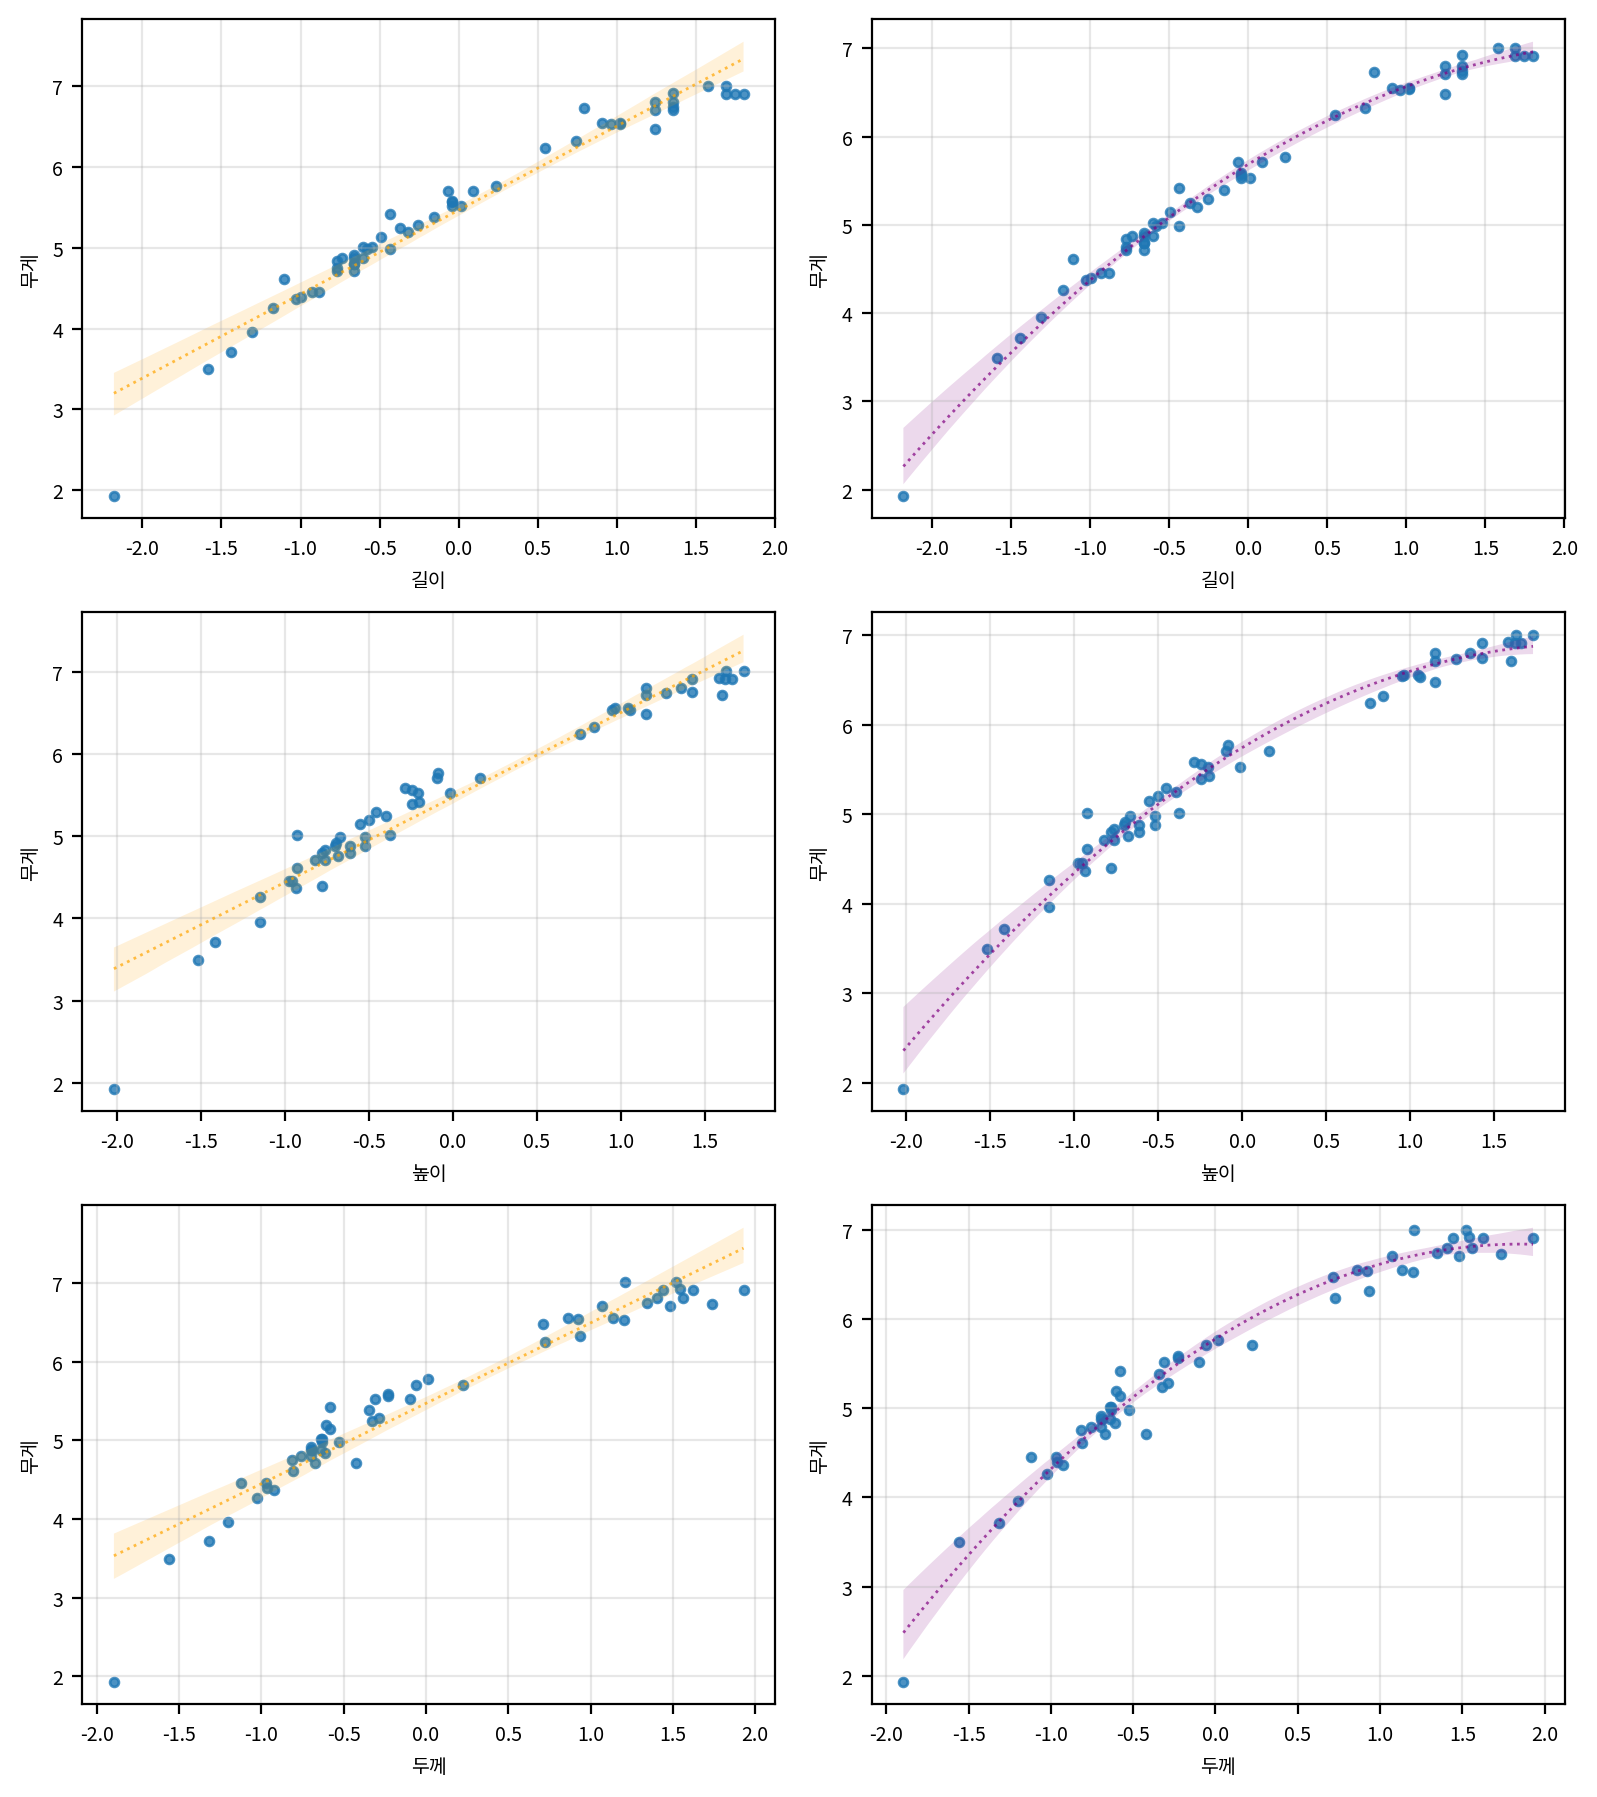

In [3]:
combo = ["길이", "높이", "두께"]
size = len(combo)
figsize = (1600 / my_dpi, 600 * size / my_dpi)
fig, ax = plt.subplots(size, 2, figsize=figsize, dpi=my_dpi)

for s in range(size):
    sb.regplot(
        data=origin,
        x=combo[s],
        y="무게",
        scatter_kws={"s": 10},
        line_kws={"color": "orange", "linewidth": 1, "alpha": 0.7, "linestyle": ":"},
        ax=ax[s][0],
    )
    ax[s][0].grid(True, alpha=0.3)

    sb.regplot(
        data=origin,
        x=combo[s],
        y="무게",
        order=2,
        scatter_kws={"s": 10},
        line_kws={"color": "purple", "linewidth": 1, "alpha": 0.7, "linestyle": ":"},
        ax=ax[s][1],
    )
    ax[s][1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [4]:
df1 = origin.drop("무게", axis=1).copy()
columns = df1.select_dtypes(include=np.number).columns

for col in columns:
    df1[f"{col}^2"] = df1[col] ** 2

df1.head()

,길이,높이,두께,길이^2,높이^2,두께^2
0,-2.180225,-2.016507,-1.896175,4.753381,4.066302,3.595479
1,-1.587434,-1.518703,-1.560774,2.519946,2.306460,2.436014
2,-1.442032,-1.417039,-1.316328,2.079457,2.008000,1.732721
3,-1.307815,-1.147103,-1.202633,1.710381,1.315845,1.446326
4,-1.173599,-1.147103,-1.026405,1.377334,1.315845,1.053508


In [5]:
for col1, col2 in combinations(columns, 2):
    df1[f"{col1}*{col2}"] = df1[col1] * df1[col2]

df1.head()

,길이,높이,두께,길이^2,높이^2,두께^2,길이*높이,길이*두께,높이*두께
0,-2.180225,-2.016507,-1.896175,4.753381,4.066302,3.595479,4.396440,4.134088,3.823651
1,-1.587434,-1.518703,-1.560774,2.519946,2.306460,2.436014,2.410841,2.477625,2.370352
2,-1.442032,-1.417039,-1.316328,2.079457,2.008000,1.732721,2.043416,1.898188,1.865289
3,-1.307815,-1.147103,-1.202633,1.710381,1.315845,1.446326,1.500199,1.572822,1.379544
4,-1.173599,-1.147103,-1.026405,1.377334,1.315845,1.053508,1.346238,1.204588,1.177393


In [6]:
df1["무게"] = origin["무게"]
df1.head()

,길이,높이,두께,길이^2,높이^2,두께^2,길이*높이,길이*두께,높이*두께,무게
0,-2.180225,-2.016507,-1.896175,4.753381,4.066302,3.595479,4.396440,4.134088,3.823651,1.931521
1,-1.587434,-1.518703,-1.560774,2.519946,2.306460,2.436014,2.410841,2.477625,2.370352,3.496508
2,-1.442032,-1.417039,-1.316328,2.079457,2.008000,1.732721,2.043416,1.898188,1.865289,3.713572
3,-1.307815,-1.147103,-1.202633,1.710381,1.315845,1.446326,1.500199,1.572822,1.379544,3.960813
4,-1.173599,-1.147103,-1.026405,1.377334,1.315845,1.053508,1.346238,1.204588,1.177393,4.262680


In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_fit = poly.fit_transform(origin[["길이", "높이", "두께"]])
poly_fit[:3]

array([[-2.18022506, -2.0165074 , -1.89617489,  4.75338133,  4.39643997,
         4.13408802,  4.06630209,  3.8236507 ,  3.59547922],
       [-1.58743393, -1.51870326, -1.56077354,  2.51994649,  2.41084109,
         2.47762488,  2.3064596 ,  2.37035187,  2.43601404],
       [-1.44203233, -1.41703904, -1.31632849,  2.07945725,  2.04341611,
         1.89818824,  2.00799964,  1.86528885,  1.73272069]])

In [8]:
poly.get_feature_names_out()

array(['길이', '높이', '두께', '길이^2', '길이 높이', '길이 두께', '높이^2', '높이 두께',
       '두께^2'], dtype=object)

In [9]:
df2 = DataFrame(poly_fit, columns=poly.get_feature_names_out())
df2["무게"] = origin["무게"]
df2.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게
0,-2.180225,-2.016507,-1.896175,4.753381,4.396440,4.134088,4.066302,3.823651,3.595479,1.931521
1,-1.587434,-1.518703,-1.560774,2.519946,2.410841,2.477625,2.306460,2.370352,2.436014,3.496508
2,-1.442032,-1.417039,-1.316328,2.079457,2.043416,1.898188,2.008000,1.865289,1.732721,3.713572
3,-1.307815,-1.147103,-1.202633,1.710381,1.500199,1.572822,1.315845,1.379544,1.446326,3.960813
4,-1.173599,-1.147103,-1.026405,1.377334,1.346238,1.204588,1.315845,1.177393,1.053508,4.262680


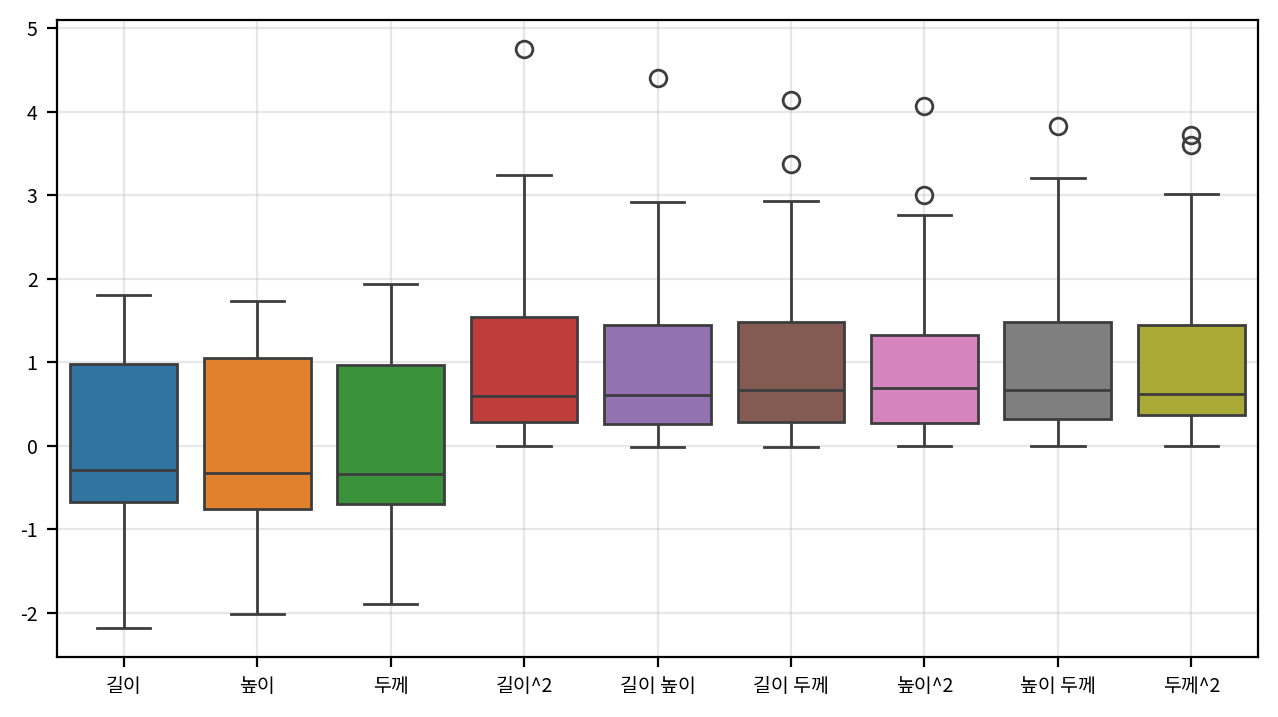

In [10]:
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)
sb.boxplot(data=df2.drop("무게", axis=1))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [11]:
df = df2.drop("무게", axis=1)
scaler = StandardScaler()
df3 = DataFrame(scaler.fit_transform(df), columns=df.columns)
df3["무게"] = df2["무게"]
df3.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게
0,-2.180225,-2.016507,-1.896175,3.708586,3.556234,3.381553,3.290051,3.122527,2.755507,1.931521
1,-1.587434,-1.518703,-1.560774,1.501806,1.485983,1.608680,1.401792,1.525106,1.524553,3.496508
2,-1.442032,-1.417039,-1.316328,1.066574,1.102893,0.988523,1.081554,0.969957,0.777897,3.713572
3,-1.307815,-1.147103,-1.202633,0.701903,0.536517,0.640291,0.338893,0.436042,0.473845,3.960813
4,-1.173599,-1.147103,-1.026405,0.372830,0.375993,0.246179,0.338893,0.213843,0.056807,4.262680


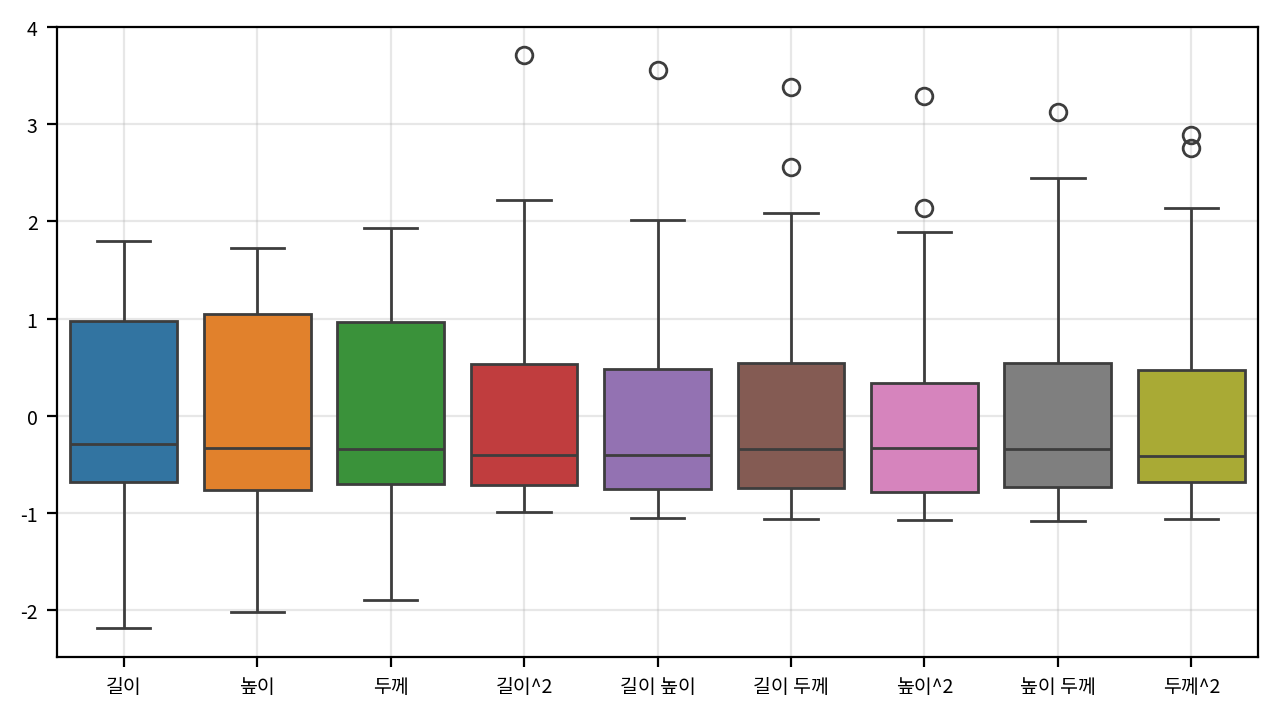

In [12]:
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)
sb.boxplot(data=df3.drop("무게", axis=1))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [13]:
df3.to_excel("fish_poly_scaled.xlsx", index=False)

In [14]:
df = df3
yname = "무게"
x = df.drop(columns=[yname])
y = df[yname]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=52
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((42, 9), (14, 9), (42,), (14,))

In [15]:
estimator = LinearRegression(n_jobs=-1)
estimator.fit(x_train, y_train)
estimator

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
y_pred = estimator.predict(x_test)

result_df = DataFrame(
    {
        "결정계수(R2)": r2_score(y_test, y_pred),
        "평균절대오차(MAE)": mean_absolute_error(y_test, y_pred),
        "평균제곱오차(MSE)": mean_squared_error(y_test, y_pred),
        "평균오차(RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "평균 절대 백분오차 비율(MAPE)": mean_absolute_percentage_error(y_test, y_pred),
        "평균 비율 오차(MPE)": np.mean((y_test - y_pred) / y_test * 100),
    },
    index=["성능지표"],
)

result_df

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
성능지표,0.953864,0.137807,0.053552,0.231413,0.022988,1.509018


In [17]:
train_sizes, train_scores, cv_scores = learning_curve(
    estimator=estimator,
    X=x,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 8),
    shuffle=True,
    random_state=52,
)

In [18]:
train_rmse = -train_scores
cv_rmse = -cv_scores

train_mean = train_rmse.mean(axis=1)
cv_mean = cv_rmse.mean(axis=1)
cv_std = cv_rmse.std(axis=1)

final_train = train_mean[-1]
final_cv = cv_mean[-1]
final_std = cv_std[-1]

gap_ratio = final_train / final_cv
var_ratio = final_std / final_cv

In [19]:
if gap_ratio >= 1.2 and var_ratio <= 0.10:
    status = "과소적합 (모델이 너무 단순)"
elif gap_ratio <= 0.9 and var_ratio >= 0.20:
    status = "과대적합 (일반화 실패)"
elif gap_ratio <= 0.9 and var_ratio <= 0.10:
    status = "일반화 양호"
elif gap_ratio <= 0.9 and var_ratio > 0.10:
    status = "데이터 부족 (표본 수 문제)"
else:
    status = "판단 유보"

print(status)

과대적합 (일반화 실패)


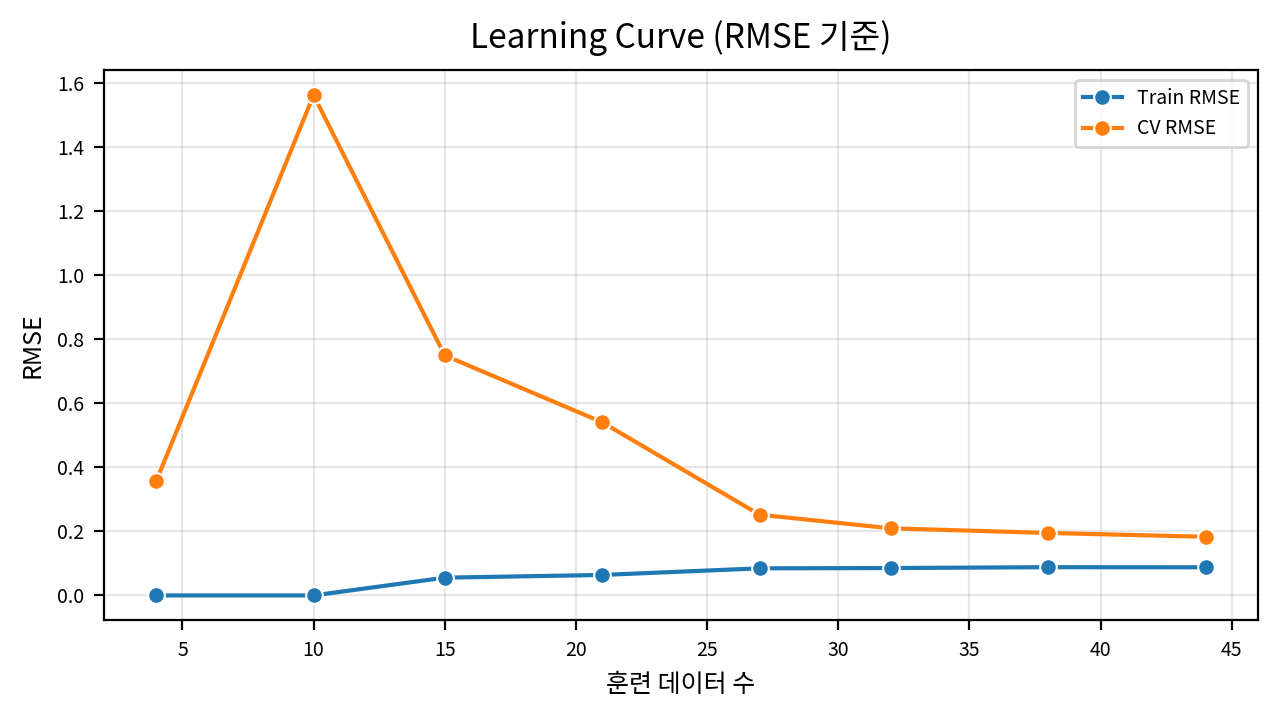

In [20]:
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

sb.lineplot(x=train_sizes, y=train_mean, marker="o", label="Train RMSE", ax=ax)
sb.lineplot(x=train_sizes, y=cv_mean, marker="o", label="CV RMSE", ax=ax)

ax.set_title("Learning Curve (RMSE 기준)", fontsize=12, pad=8)
ax.set_xlabel("훈련 데이터 수", fontsize=9)
ax.set_ylabel("RMSE", fontsize=9)
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()
plt.close()

In [21]:
result_df = DataFrame(
    {
        "지표": [
            "Train RMSE",
            "CV RMSE 평균",
            "CV RMSE 표준편차",
            "Train/CV 비율",
            "CV 변동성 비율",
            "판정 결과",
        ],
        "값": [
            final_train,
            final_cv,
            final_std,
            gap_ratio,
            var_ratio,
            status,
        ],
    }
)

result_df

,지표,값
0,Train RMSE,0.087883
1,CV RMSE 평균,0.183345
2,CV RMSE 표준편차,0.075449
3,Train/CV 비율,0.479333
4,CV 변동성 비율,0.411515
5,판정 결과,과대적합 (일반화 실패)


In [22]:
rdf = x_train.copy()
rdf[yname] = y_train
rdf["y_pred"] = estimator.predict(x_train)
rdf["resid"] = rdf[yname] - rdf["y_pred"]
rdf.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게,y_pred,resid
19,-0.603177,-0.701884,-0.639841,-0.628585,-0.586230,-0.630003,-0.544381,-0.586680,-0.627018,4.875197,4.908031,-0.032834
37,0.548851,0.759978,0.724503,-0.690423,-0.592742,-0.617473,-0.453259,-0.475101,-0.504387,6.244167,6.306256,-0.062089
40,0.962686,1.057959,1.202024,-0.072361,0.034264,0.195431,0.127981,0.317494,0.472290,6.530878,6.551430,-0.020553
6,-1.028197,-0.933258,-0.924079,0.056507,-0.027158,-0.026155,-0.138446,-0.132382,-0.155084,4.369448,4.366845,0.002603
24,-0.435406,-0.200574,-0.582993,-0.800750,-0.936585,-0.771385,-1.029805,-0.951781,-0.700819,5.420535,5.291679,0.128856


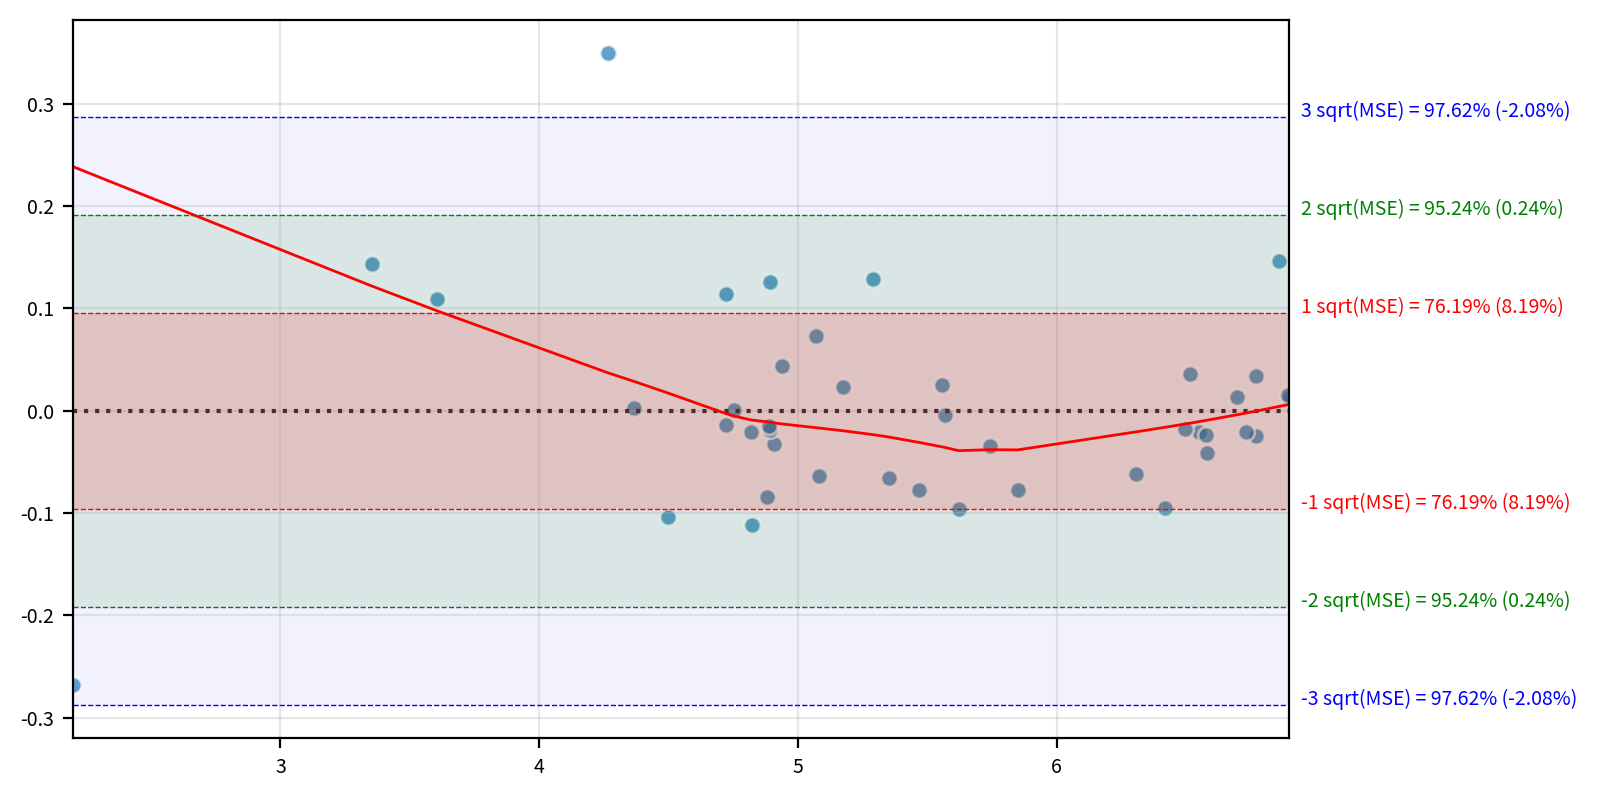

In [23]:
y = rdf[yname].values
y_pred = rdf["y_pred"].values
resid = rdf["resid"].values

figsize = (1600 / my_dpi, 800 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

sb.residplot(
    x=y_pred,
    y=resid,
    lowess=True,
    line_kws={"color": "red", "linewidth": 1},
    scatter_kws={"edgecolor": "white", "alpha": 0.7},
)

mse_val = mean_squared_error(y, y_pred)
mse_sq = np.sqrt(mse_val)

r1 = resid[(resid > -mse_sq) & (resid < mse_sq)].size / resid.size * 100
r2 = resid[(resid > -2 * mse_sq) & (resid < 2 * mse_sq)].size / resid.size * 100
r3 = resid[(resid > -3 * mse_sq) & (resid < 3 * mse_sq)].size / resid.size * 100

mse_r = [r1, r2, r3]
xmin, xmax = ax.get_xlim()

colors = ["red", "green", "blue"]
alphas = [0.15, 0.10, 0.05]

ax.axhspan(-3 * mse_sq, 3 * mse_sq, facecolor=colors[2], alpha=alphas[2], zorder=0)
ax.axhspan(-2 * mse_sq, 2 * mse_sq, facecolor=colors[1], alpha=alphas[1], zorder=1)
ax.axhspan(-mse_sq, mse_sq, facecolor=colors[0], alpha=alphas[0], zorder=2)

for i, c in enumerate(["red", "green", "blue"]):
    ax.axhline(mse_sq * (i + 1), color=c, linestyle="--", linewidth=0.5)
    ax.axhline(mse_sq * (-(i + 1)), color=c, linestyle="--", linewidth=0.5)

target = [68, 95, 99.7]
for i, c in enumerate(["red", "green", "blue"]):
    ax.text(
        s=f"{i+1} sqrt(MSE) = {mse_r[i]:.2f}% ({mse_r[i] - target[i]:.2f}%)",
        x=xmax + 0.05,
        y=(i + 1) * mse_sq,
        color=c,
    )
    ax.text(
        s=f"-{i+1} sqrt(MSE) = {mse_r[i]:.2f}% ({mse_r[i] - target[i]:.2f}%)",
        x=xmax + 0.05,
        y=-(i + 1) * mse_sq,
        color=c,
    )

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

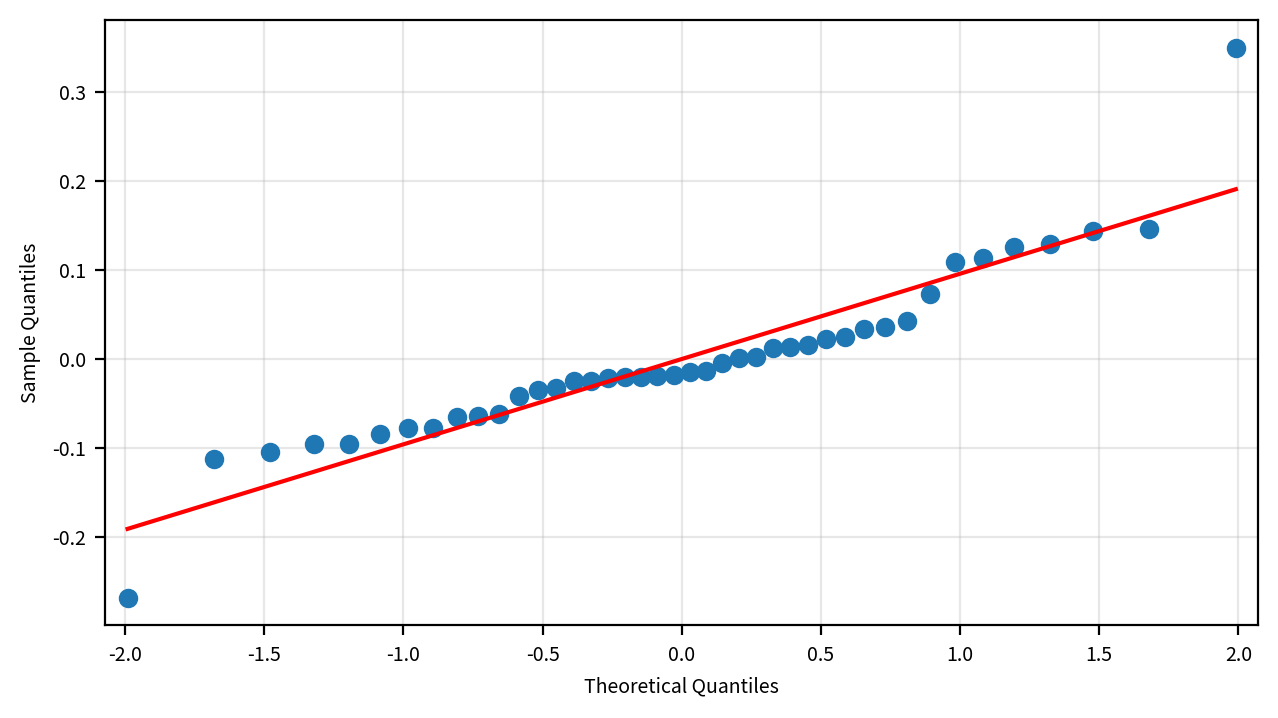

In [24]:
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

sm_qqplot(rdf["resid"], line="s", ax=ax)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [25]:
residuals = rdf["resid"].values
n = len(residuals)
alpha = 0.05
results = []

if n < 5000:
    try:
        stat_sw, p_sw = shapiro(residuals)
        significant_sw = p_sw <= alpha

        if significant_sw:
            interpretation_sw = f"정규성 위반 (p={p_sw:.4f} <= {alpha})"
        else:
            interpretation_sw = f"정규성 만족 (p={p_sw:.4f} > {alpha})"

        results.append(
            {
                "검정": "Shapiro-Wilk",
                "검정통계량": f"{stat_sw:.4f}",
                "p-value": f"{p_sw:.4f}",
                "유의수준": alpha,
                "정규성_위반": significant_sw,
                "해석": interpretation_sw,
            }
        )
    except Exception as e:
        pass

try:
    stat_jb, p_jb = jarque_bera(residuals)
    significant_jb = p_jb <= alpha

    if significant_jb:
        interpretation_jb = f"정규성 위반 (p={p_jb:.4f} <= {alpha})"
    else:
        interpretation_jb = f"정규성 만족 (p={p_jb:.4f} > {alpha})"

    results.append(
        {
            "검정": "Jarque-Bera",
            "검정통계량": f"{stat_jb:.4f}",
            "p-value": f"{p_jb:.4f}",
            "유의수준": alpha,
            "정규성_위반": significant_jb,
            "해석": interpretation_jb,
        }
    )
except Exception as e:
    pass

result_df = DataFrame(results)
result_df

,검정,검정통계량,p-value,유의수준,정규성_위반,해석
0,Shapiro-Wilk,0.9086,0.0026,0.05,True,정규성 위반 (p=0.0026 <= 0.05)
1,Jarque-Bera,24.5382,0.0000,0.05,True,정규성 위반 (p=0.0000 <= 0.05)


In [26]:
resid = rdf["resid"]
alpha = 0.05
results = []
exog = rdf.drop(columns=[yname, "y_pred", "resid"])
exog = sm.add_constant(exog)

try:
    lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(resid, exog)
    significant_bp = lm_pvalue <= alpha

    if significant_bp:
        interpretation_bp = f"등분산성 위반 (p={lm_pvalue:.4f} <= {alpha})"
    else:
        interpretation_bp = f"등분산성 만족 (p={lm_pvalue:.4f} > {alpha})"

    results.append(
        {
            "검정": "Breusch-Pagan",
            "검정통계량 (LM)": f"{lm:.4f}",
            "p-value": f"{lm_pvalue:.4f}",
            "유의수준": alpha,
            "등분산성_위반": significant_bp,
            "해석": interpretation_bp,
        }
    )
except Exception as e:
    pass

try:
    lm, lm_pvalue, fvalue, f_pvalue = het_white(resid, exog)
    significant_white = lm_pvalue <= alpha

    if significant_white:
        interpretation_white = f"등분산성 위반 (p={lm_pvalue:.4f} <= {alpha})"
    else:
        interpretation_white = f"등분산성 만족 (p={lm_pvalue:.4f} > {alpha})"

    results.append(
        {
            "검정": "White",
            "검정통계량 (LM)": f"{lm:.4f}",
            "p-value": f"{lm_pvalue:.4f}",
            "유의수준": alpha,
            "등분산성_위반": significant_white,
            "해석": interpretation_white,
        }
    )
except Exception as e:
    pass

result_df = DataFrame(results)
result_df

,검정,검정통계량 (LM),p-value,유의수준,등분산성_위반,해석
0,Breusch-Pagan,24.0866,0.0042,0.05,True,등분산성 위반 (p=0.0042 <= 0.05)
1,White,41.9329,0.1647,0.05,False,등분산성 만족 (p=0.1647 > 0.05)


In [27]:
dw_stat = durbin_watson(rdf["resid"])
is_autocorrelated = dw_stat < 1.5 or dw_stat > 2.5

if dw_stat < 1.5:
    interpretation = f"DW={dw_stat:.4f} < 1.5 (양의 자기상관)"
elif dw_stat > 2.5:
    interpretation = f"DW={dw_stat:.4f} > 2.5 (음의 자기상관)"
else:
    interpretation = f"DW={dw_stat:.4f} (독립성 가정 만족)"

result_df = DataFrame(
    {
        "검정": ["Durbin-Watson"],
        "검정통계량(DW)": [dw_stat],
        "독립성_위반": [is_autocorrelated],
        "해석": [interpretation],
    }
)

result_df

,검정,검정통계량(DW),독립성_위반,해석
0,Durbin-Watson,2.141833,False,DW=2.1418 (독립성 가정 만족)


In [28]:
yname = "무게"
xnames = list(x_train.columns)

y_train_pred = estimator.predict(x_train)
resid = y_train - y_train_pred
dw = durbin_watson(resid)

In [29]:
r2 = r2_score(y_train, y_train_pred)
r = np.sqrt(r2)
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - len(xnames) - 1)

rowcount = len(x_train)
featurecount = len(xnames)

f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))
p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

r2, adj_r2

(0.9918927560610569, 0.9896125937032291)

In [30]:
rdf = DataFrame(
    {
        "R": [r],
        "R²": [r2],
        "Adj R²": [adj_r2],
        "F": [f_statistic],
        "p-value": [p],
        "Durbin-Watson": [dw],
    }
)

display(rdf)

tpl = "R(%.3f), R²(%.3f), Adj R²(%.3f), 𝐹(%.3f), P-value(%.3f), Durbin-Watson(%.3f)"
print(tpl % (r, r2, adj_r2, f_statistic, p, dw))

,R,R²,Adj R²,F,p-value,Durbin-Watson
0,0.995938,0.991893,0.989613,435.009706,0.0,2.141833


R(0.996), R²(0.992), Adj R²(0.990), 𝐹(435.010), P-value(0.000), Durbin-Watson(2.142)


In [31]:
tpl = "%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s) = %0.3f, p %s 0.05)."

print(
    tpl
    % (
        yname,
        ",".join(xnames),
        "유의하다" if p <= 0.05 else "유의하지 않다",
        len(x_train.columns),
        len(x_train.index) - len(x_train.columns) - 1,
        f_statistic,
        "<=" if p <= 0.05 else ">",
    )
)

무게에 대하여 길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(9,32) = 435.010, p <= 0.05).


In [32]:
params = np.append(estimator.intercept_, estimator.coef_)

design_x = x_train.copy()
design_x = sm.add_constant(design_x)

In [33]:
dot = np.dot(design_x.T, design_x)
inv = np.linalg.inv(dot)
dia = inv.diagonal()

predictions = estimator.predict(x_train)
n = design_x.shape[0]
p = design_x.shape[1]
MSE = ((y_train - predictions) ** 2).sum() / (n - p)

se_b = np.sqrt(MSE * dia)

In [34]:
ts_b = params / se_b

n = design_x.shape[0]
p = design_x.shape[1]
p_values = [2 * (1 - t.cdf(np.abs(i), n - p)) for i in ts_b]

In [35]:
vif = []
for i, v in enumerate(xnames):
    j = list(x_train.columns).index(v)
    vif.append(variance_inflation_factor(x_train, j))

In [36]:
scaler = StandardScaler()
tmp_df = x_train.copy()
tmp_df[yname] = y_train
std = scaler.fit_transform(tmp_df)
std_df = DataFrame(std, columns=tmp_df.columns)
std_x = tmp_df.drop(columns=[yname])
std_y = tmp_df[yname]
s_estimator = LinearRegression(n_jobs=-1)
s_estimator.fit(std_x, std_y)
beta = s_estimator.coef_

In [37]:
result_df = DataFrame(
    {
        "종속변수": [yname] * len(xnames),
        "독립변수": xnames,
        "B(비표준화 계수)": np.round(params[1:], 4),
        "표준오차": np.round(se_b[1:], 4),
        "β(표준화 계수)": np.round(beta, 4),
        "t": np.round(ts_b[1:], 4),
        "유의확률": np.round(p_values[1:], 4),
        "VIF": np.round(vif, 4),
    }
)

result_df["t"] = result_df["t"].astype("str") + result_df["유의확률"].apply(
    lambda p: "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else ""
)

display(result_df)

,종속변수,독립변수,B(비표준화 계수),표준오차,β(표준화 계수),t,유의확률,VIF
0,무게,길이,0.6768,0.1377,0.6768,4.9146***,0.0000,64.6553
1,무게,높이,0.3293,0.1277,0.3293,2.5784*,0.0147,54.1848
2,무게,두께,0.1130,0.1415,0.1130,0.7981,0.4307,64.5841
3,무게,길이^2,-0.5786,0.8119,-0.5786,-0.7127,0.4812,2238.1265
4,무게,길이 높이,-0.6215,1.1090,-0.6215,-0.5604,0.5791,4542.2840
5,무게,길이 두께,1.4496,0.9844,1.4496,1.4725,0.1506,2817.8073
6,무게,높이^2,0.3572,0.6281,0.3572,0.5687,0.5735,1396.1782
7,무게,높이 두께,-0.3184,0.8696,-0.3184,-0.3662,0.7166,2721.2590
8,무게,두께^2,-0.5869,0.5123,-0.5869,-1.1458,0.2604,727.8714


In [ ]:
varstr = []

for n in xnames:
    item = result_df[result_df["독립변수"] == n]
    coef = float(item["B(비표준화 계수)"].values[0])
    pvalue = float(item["유의확률"].values[0])

    s = "%s가 1증가하면 %s(이)가 %0.3f만큼 변하는 것으로 나타남 (p %s 0.05, %s)"
    k = s % (
        n,
        yname,
        coef,
        "<=" if pvalue <= 0.05 else ">",
        ("유의함" if pvalue <= 0.05 else "유의하지 않음"),
    )

    varstr.append(k)

for s in varstr:
    print("- " + s)

- 길이가 1증가하면 무게(이)가 0.677만큼 변하는 것으로 나타남 (p <= 0.05, 유의함)
- 높이가 1증가하면 무게(이)가 0.329만큼 변하는 것으로 나타남 (p <= 0.05, 유의함)
- 두께가 1증가하면 무게(이)가 0.113만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)
- 길이^2가 1증가하면 무게(이)가 -0.579만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)
- 길이 높이가 1증가하면 무게(이)가 -0.622만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)
- 길이 두께가 1증가하면 무게(이)가 1.450만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)
- 높이^2가 1증가하면 무게(이)가 0.357만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)
- 높이 두께가 1증가하면 무게(이)가 -0.318만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)
- 두께^2가 1증가하면 무게(이)가 -0.587만큼 변하는 것으로 나타남 (p > 0.05, 유의하지 않음)
